# 01 — EDA CNH-PSX (Mendeley)
Exploratory Data Analysis of the main dataset: categorized PSX news headlines.
**Goal**: understand the structure, quality, and distribution of the data before moving to preprocessing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load both Mendeley CSV files
# Download them from https://data.mendeley.com/datasets/mc4s7zvx9c/1
# and place them in data/raw/
df_v1 = pd.read_csv('../data/raw/CNH-PSX_Ver1.csv')
df_v2 = pd.read_csv('../data/raw/CNH-PSX_Ver2.csv')

print('V1 shape:', df_v1.shape)
print('V2 shape:', df_v2.shape)

V1 shape: (12292, 3)
V2 shape: (12292, 4)


In [2]:
# Column overview
print('--- V1 ---')
print(df_v1.head())
print(df_v1.dtypes)
print('\n--- V2 ---')
print(df_v2.head())
print(df_v2.dtypes)

--- V1 ---
  Publishing Date                                          Headlines Category
0        4/1/2006                 ['KSE index plunges by 83 points']   Market
1        4/6/2006  ['Karachi stocks record mixed trend,,,,,By our...   Market
2        4/8/2006        ['KSE index touches another all-time high']   Market
3        4/9/2006      ['KSE performs well, index gains 451 points']   Market
4       4/11/2006            ['KSE breaches 12,000 barrier briefly']   Market
Publishing Date    object
Headlines          object
Category           object
dtype: object

--- V2 ---
  Publishing Date                                          Headlines Category  \
0        4/1/2006                 ['KSE index plunges by 83 points']   Market   
1        4/6/2006  ['Karachi stocks record mixed trend,,,,,By our...   Market   
2        4/8/2006        ['KSE index touches another all-time high']   Market   
3        4/9/2006      ['KSE performs well, index gains 451 points']   Market   
4       4/11

In [3]:
# Missing values
print('Nulls V1:\n', df_v1.isnull().sum())
print('Nulls V2:\n', df_v2.isnull().sum())

Nulls V1:
 Publishing Date    0
Headlines          0
Category           0
dtype: int64
Nulls V2:
 Publishing Date                     0
Headlines                           0
Category                            0
Structural Hierarchy Description    0
dtype: int64


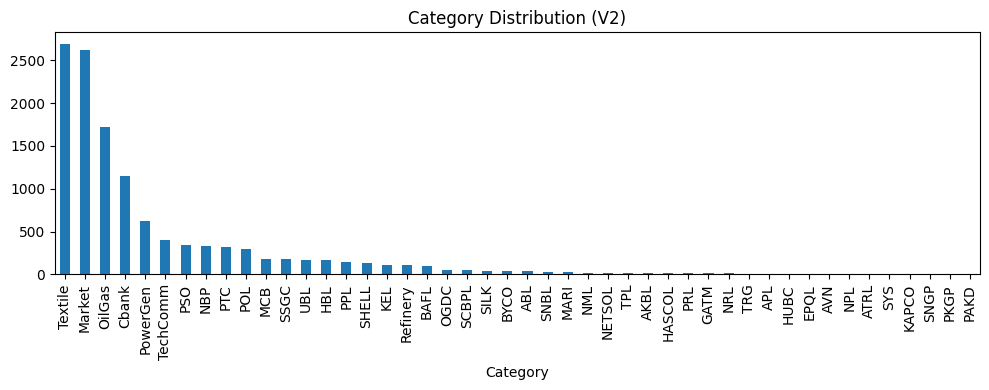

In [7]:
# Category distribution (adjust column name if needed)
cat_col = 'Category' 
if cat_col in df_v2.columns:
    df_v2[cat_col].value_counts().plot(kind='bar', figsize=(10, 4), title='Category Distribution (V2)')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_25957/2294342405.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_v2.set_index(date_col).resample('M').size().plot(figsize=(12, 4), title='Articles per Month')


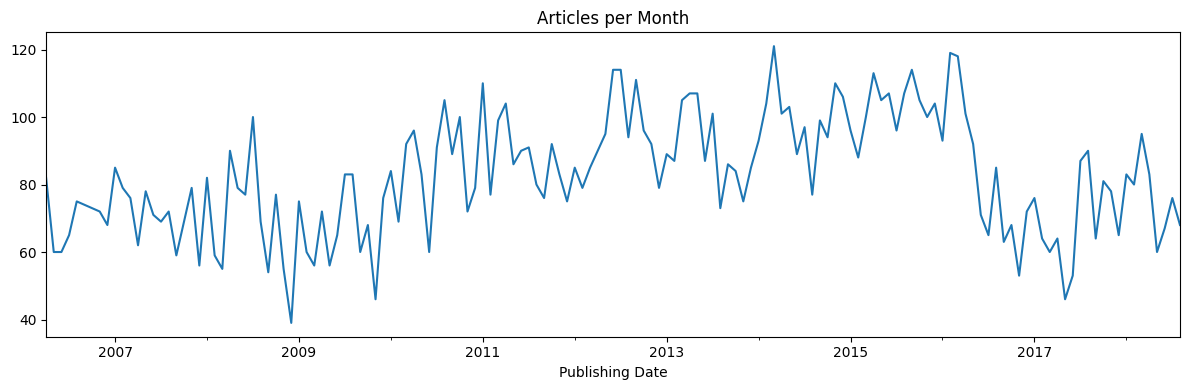

In [8]:
# Temporal distribution
date_col = 'Publishing Date'  # adjust if needed
if date_col in df_v2.columns:
    df_v2[date_col] = pd.to_datetime(df_v2[date_col], errors='coerce')
    df_v2.set_index(date_col).resample('M').size().plot(figsize=(12, 4), title='Articles per Month')
    plt.tight_layout()
    plt.show()

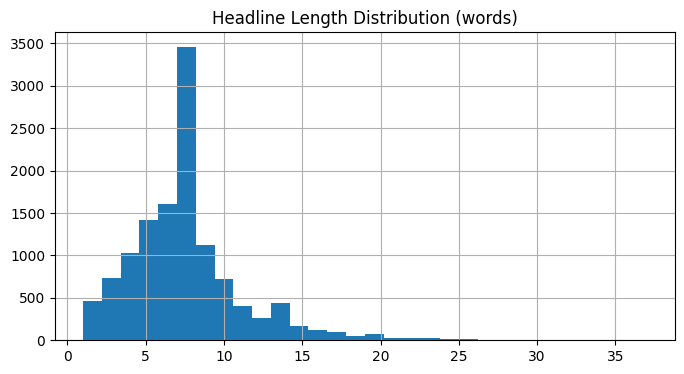

count    12292.000000
mean         7.505044
std          3.720907
min          1.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         37.000000
Name: headline_len, dtype: float64


In [9]:
# Headline length distribution
text_col = 'Headlines'  # adjust if needed
if text_col in df_v2.columns:
    df_v2['headline_len'] = df_v2[text_col].str.split().str.len()
    df_v2['headline_len'].hist(bins=30, figsize=(8, 4))
    plt.title('Headline Length Distribution (words)')
    plt.show()
    print(df_v2['headline_len'].describe())

In [10]:
# Duplicates
if text_col in df_v2.columns:
    dupes = df_v2[text_col].duplicated().sum()
    print(f'Duplicate headlines in V2: {dupes}')

Duplicate headlines in V2: 3354


## EDA Conclusions
- [ ] Available columns: ...
- [ ] Date range: ...
- [ ] Main categories: ...
- [ ] Duplicates to clean: ...
- [ ] Average headline length: ...
- [ ] Key points to address in preprocessing: ...